# Product Demand Prediction 

In [2]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:/Users/Rama Krishna Veni/Desktop/demand of product.csv")
data

,ID,Store ID,Total Price,Base Price,Items Sold,Item ID
0,1,8091,99.0375,111.8625,20,401.0
1,2,8091,99.0375,99.0375,28,402.0
2,3,8091,133.9500,133.9500,19,403.0
3,4,8091,133.9500,133.9500,44,404.0
4,5,8091,141.0750,141.0750,52,405.0
...,...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38,858750.0
150146,212639,9984,235.8375,235.8375,30,858751.0
150147,212642,9984,357.6750,483.7875,31,858752.0
150148,212643,9984,141.7875,191.6625,12,858753.0


In [4]:
data.head()

,ID,Store ID,Total Price,Base Price,Items Sold,Item ID
0,1,8091,99.0375,111.8625,20,401.0
1,2,8091,99.0375,99.0375,28,402.0
2,3,8091,133.9500,133.9500,19,403.0
3,4,8091,133.9500,133.9500,44,404.0
4,5,8091,141.0750,141.0750,52,405.0


In [5]:
data.tail()

,ID,Store ID,Total Price,Base Price,Items Sold,Item ID
150145,212638,9984,235.8375,235.8375,38,858750.0
150146,212639,9984,235.8375,235.8375,30,858751.0
150147,212642,9984,357.6750,483.7875,31,858752.0
150148,212643,9984,141.7875,191.6625,12,858753.0
150149,212644,9984,234.4125,234.4125,15,858754.0


In [6]:
data.shape

(150150, 6)

In [7]:
data['Item ID'].unique

<bound method Series.unique of 0            401.0
1            402.0
2            403.0
3            404.0
4            405.0
            ...   
150145    858750.0
150146    858751.0
150147    858752.0
150148    858753.0
150149    858754.0
Name: Item ID, Length: 150150, dtype: float64>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Items Sold   150150 non-null  int64  
 5   Item ID      81622 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [9]:
data.describe()

,ID,Store ID,Total Price,Base Price,Items Sold,Item ID
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,81622.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206,85128.803913
std,61386.037861,615.591445,103.308516,110.961712,60.207904,190054.748219
min,1.000000,8023.000000,41.325000,61.275000,1.000000,401.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000,20806.250000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000,41211.500000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000,61616.750000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000,858754.000000


In [10]:
data['Store ID'].unique()

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984],
      dtype=int64)

In [11]:
data.isnull().sum()

ID                 0
Store ID           0
Total Price        1
Base Price         0
Items Sold         0
Item ID        68528
dtype: int64

In [12]:
data1=data.drop(['ID','Item ID'],axis=1)

In [13]:
data1

,Store ID,Total Price,Base Price,Items Sold
0,8091,99.0375,111.8625,20
1,8091,99.0375,99.0375,28
2,8091,133.9500,133.9500,19
3,8091,133.9500,133.9500,44
4,8091,141.0750,141.0750,52
...,...,...,...,...
150145,9984,235.8375,235.8375,38
150146,9984,235.8375,235.8375,30
150147,9984,357.6750,483.7875,31
150148,9984,141.7875,191.6625,12


In [14]:
data1=data1.dropna()

In [15]:
data1

,Store ID,Total Price,Base Price,Items Sold
0,8091,99.0375,111.8625,20
1,8091,99.0375,99.0375,28
2,8091,133.9500,133.9500,19
3,8091,133.9500,133.9500,44
4,8091,141.0750,141.0750,52
...,...,...,...,...
150145,9984,235.8375,235.8375,38
150146,9984,235.8375,235.8375,30
150147,9984,357.6750,483.7875,31
150148,9984,141.7875,191.6625,12


In [16]:
y=data1['Total Price']
y

0          99.0375
1          99.0375
2         133.9500
3         133.9500
4         141.0750
            ...   
150145    235.8375
150146    235.8375
150147    357.6750
150148    141.7875
150149    234.4125
Name: Total Price, Length: 150149, dtype: float64

In [17]:
x=data1.drop('Total Price',axis=1)
x

,Store ID,Base Price,Items Sold
0,8091,111.8625,20
1,8091,99.0375,28
2,8091,133.9500,19
3,8091,133.9500,44
4,8091,141.0750,52
...,...,...,...
150145,9984,235.8375,38
150146,9984,235.8375,30
150147,9984,483.7875,31
150148,9984,191.6625,12


# Linear Regression 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)#50500,#99650,#0.25 0.92,#0.33 0.92
x_test.head(10)

,Store ID,Base Price,Items Sold
99854,9279,171.0000,59
8822,9532,110.4375,26
148833,9845,214.4625,81
119748,9611,327.0375,48
145670,8121,483.7875,54
113925,9532,86.9250,40
11127,9498,213.0375,206
81876,9876,205.2000,32
83000,9845,498.0375,23
72813,8094,177.4125,7


In [19]:
y_train.shape,x_train.shape

((105104,), (105104, 3))

In [20]:
y_test.shape,x_test.shape

((45045,), (45045, 3))

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
ypred=reg.predict(x_test)
ypred

array([162.74437063, 115.11823661, 197.00395489, ..., 176.45230219,
       205.30098477, 313.60945265])

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9279149769910578

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

758.096230935083

In [25]:
results=pd.DataFrame(columns=['Total Price','predicted'])
results['Total Price']=y_test
results['predicted']=ypred
results=results.reset_index()
results['ID']=results.index
results.head()

,index,Total Price,predicted,ID
0,99854,171.0000,162.744371,0
1,8822,110.4375,115.118237,1
2,148833,214.4625,197.003955,2
3,119748,327.0375,302.000780,3
4,145670,375.4875,439.426666,4


[]

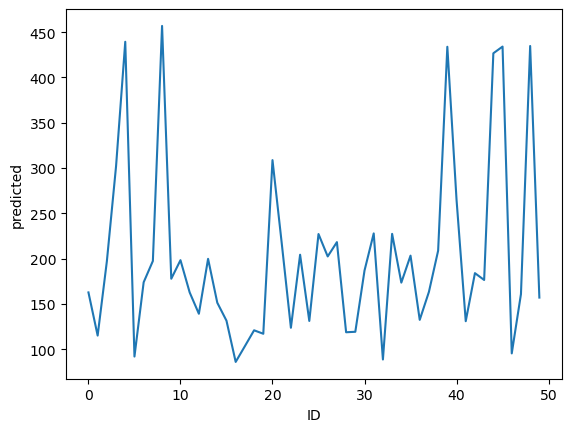

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.lineplot(x='ID',y='Total Price',data=results.head(50))
sns.lineplot(x='ID',y='predicted',data=results.head(50))
plt.plot()

[]

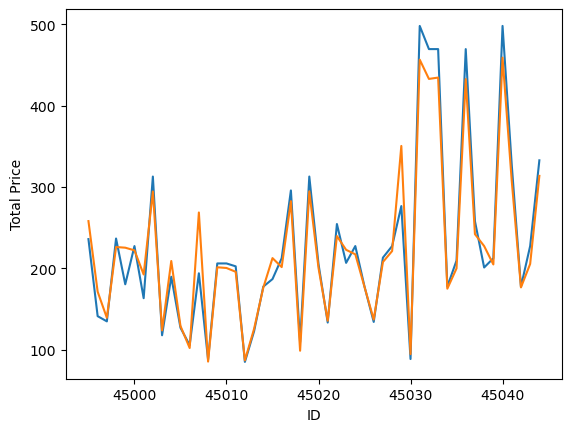

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='Total Price',data=results.tail(50))
sns.lineplot(x='ID',y='predicted',data=results.tail(50))
plt.plot()

In [28]:
cor_mat=data1.corr()
cor_mat

,Store ID,Total Price,Base Price,Items Sold
Store ID,1.000000,-0.038315,-0.038855,-0.004369
Total Price,-0.038315,1.000000,0.958885,-0.235625
Base Price,-0.038855,0.958885,1.000000,-0.140022
Items Sold,-0.004369,-0.235625,-0.140022,1.000000


<Axes: >

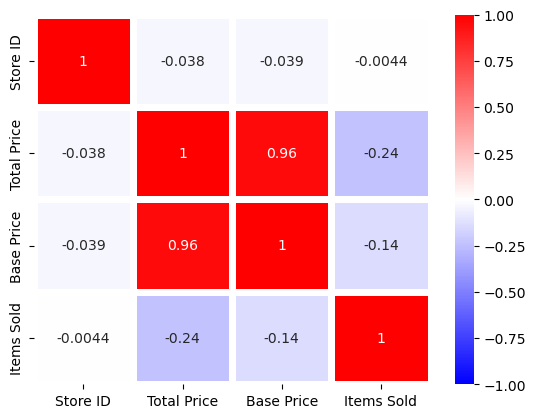

In [29]:
sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidths=5,cmap='bwr')

# Elastic Net

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [31]:
elastic_regressor.best_params_

{'alpha': 1}

In [32]:
elastic=ElasticNet(alpha=1)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.927915030793931

In [34]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

758.0956651066532

In [35]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,99854,171.0000,162.748655,0
1,8822,110.4375,115.121888,1
2,148833,214.4625,197.009164,2
3,119748,327.0375,301.993705,3
4,145670,375.4875,439.408909,4
5,113925,86.9250,91.963912,5
6,11127,178.1250,173.961697,6
7,81876,205.2000,197.424859,7
8,83000,498.0375,456.895200,8
9,72813,177.4125,177.840840,9


[]

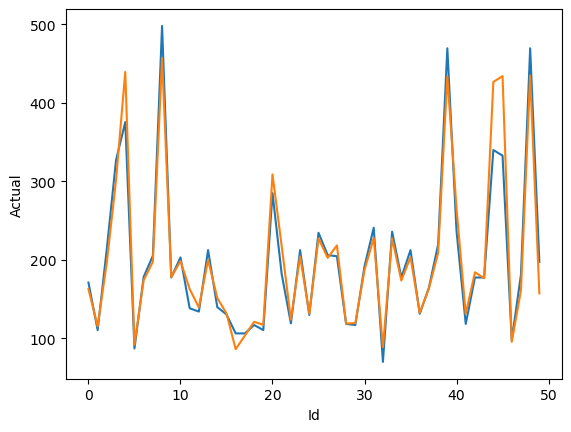

In [36]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

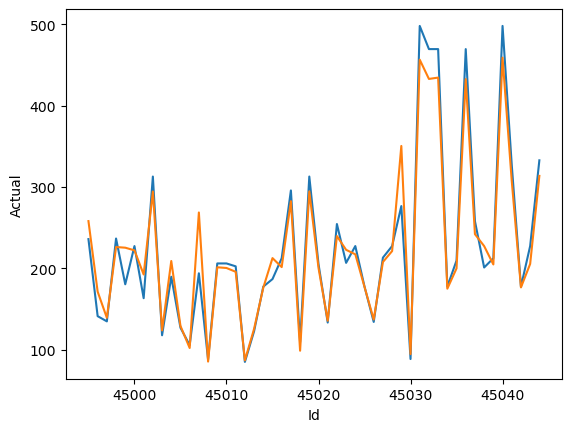

In [37]:
sns.lineplot(x='Id',y='Actual',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()